# 📊 India's Population Distribution and Growth Analysis

In [2]:
# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ✅ Step 2: Load and Clean Data
df = pd.read_csv("Sample_dataset.csv", skiprows=4)

In [6]:
# ✅ Step 3: Extract India's Total Population Data
india = df[(df["Country Name"] == "India") & 
           (df["Indicator Name"] == "Population, total")]

In [8]:
# ✅ Step 4: Transpose and Format
population = india.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis=1).T
population.reset_index(inplace=True)
population.columns = ["Year", "Population"]
population = population[population["Year"].str.isnumeric()]
population["Year"] = population["Year"].astype(int)
population["Population"] = population["Population"].astype(float)

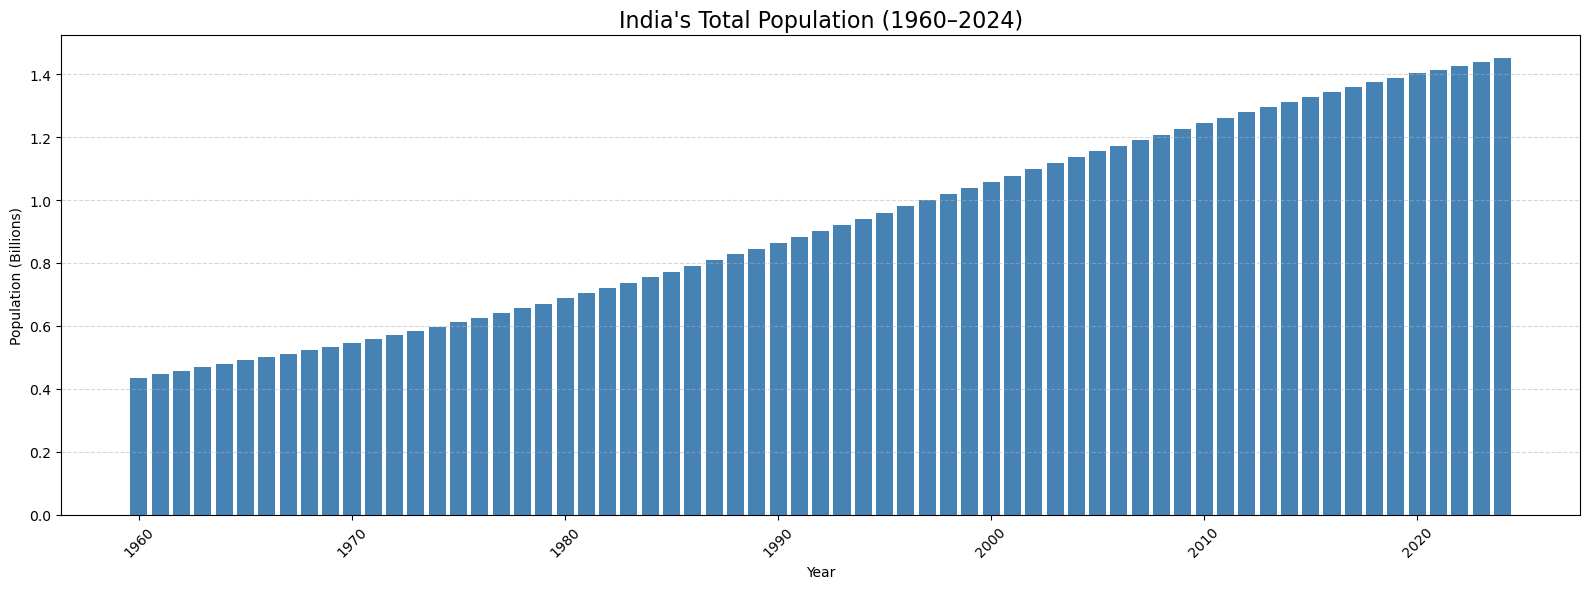

In [10]:
# ✅ Step 5: Plot - Bar Chart
plt.figure(figsize=(16, 6))
plt.bar(population["Year"], population["Population"] / 1e9, color="steelblue")
plt.title("India's Total Population (1960–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# ✅ Step 6: Calculate Growth Rate
population["Growth Rate (%)"] = population["Population"].pct_change() * 100

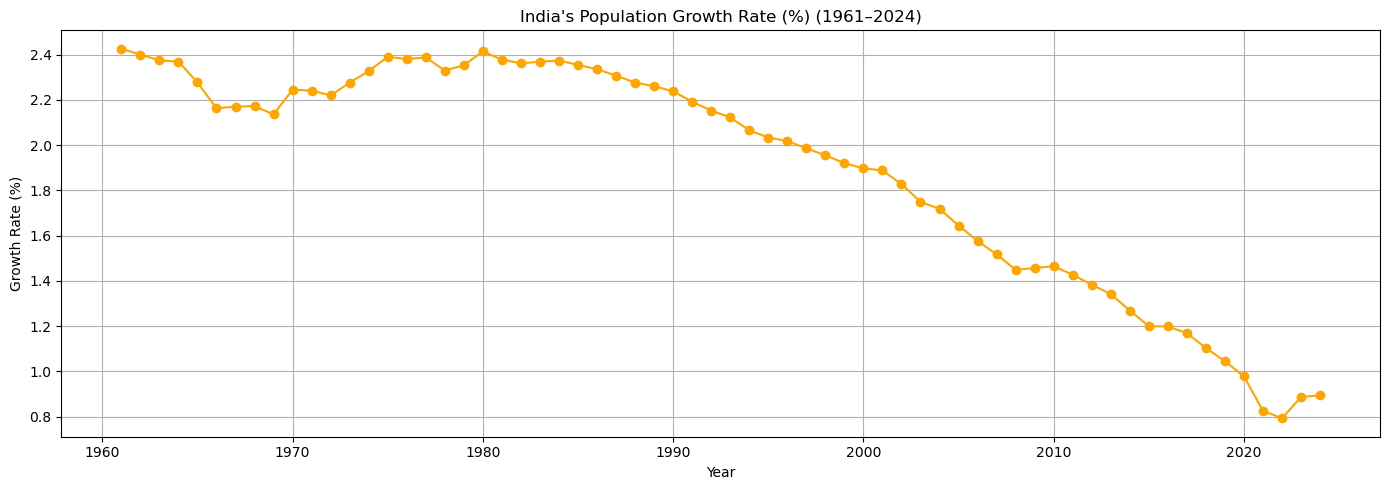

In [14]:
# ✅ Step 7: Line Chart - Growth Rate
plt.figure(figsize=(14, 5))
plt.plot(population["Year"], population["Growth Rate (%)"], marker='o', color='orange')
plt.title("India's Population Growth Rate (%) (1961–2024)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

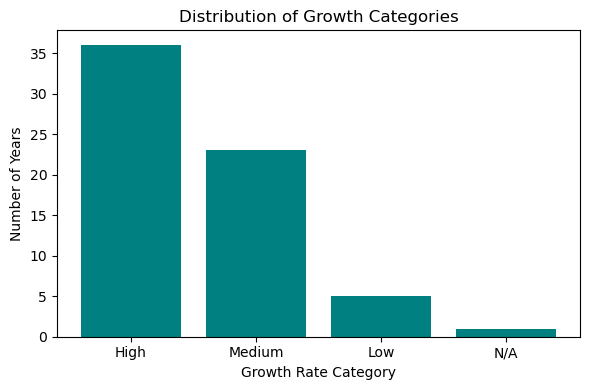

In [18]:
# ✅ Step 8: Histogram - Growth Categories
def categorize_growth(rate):
    if pd.isna(rate): return "N/A"
    elif rate < 1: return "Low"
    elif rate < 2: return "Medium"
    else: return "High"

population["Growth Category"] = population["Growth Rate (%)"].apply(categorize_growth)
growth_counts = population["Growth Category"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(growth_counts.index, growth_counts.values, color='teal')
plt.title("Distribution of Growth Categories")
plt.xlabel("Growth Rate Category")
plt.ylabel("Number of Years")
plt.tight_layout()
plt.show()

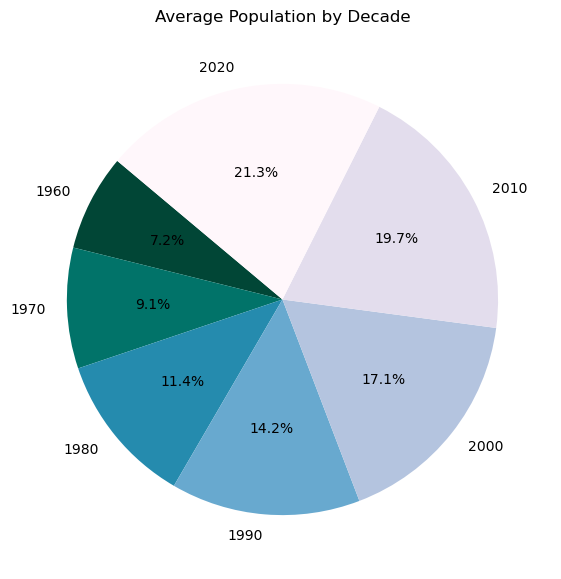

In [22]:
# ✅ Step 9: Pie Chart - Population by Decade
import numpy as np  # add this at the top if not already imported

population["Decade"] = (population["Year"] // 10) * 10
pop_by_decade = population.groupby("Decade")["Population"].mean().reset_index()

# ✅ FIX: generate color list from colormap
colors = plt.cm.PuBuGn_r(np.linspace(0, 1, len(pop_by_decade)))

plt.figure(figsize=(7, 7))
plt.pie(pop_by_decade["Population"], labels=pop_by_decade["Decade"],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Average Population by Decade")
plt.show()

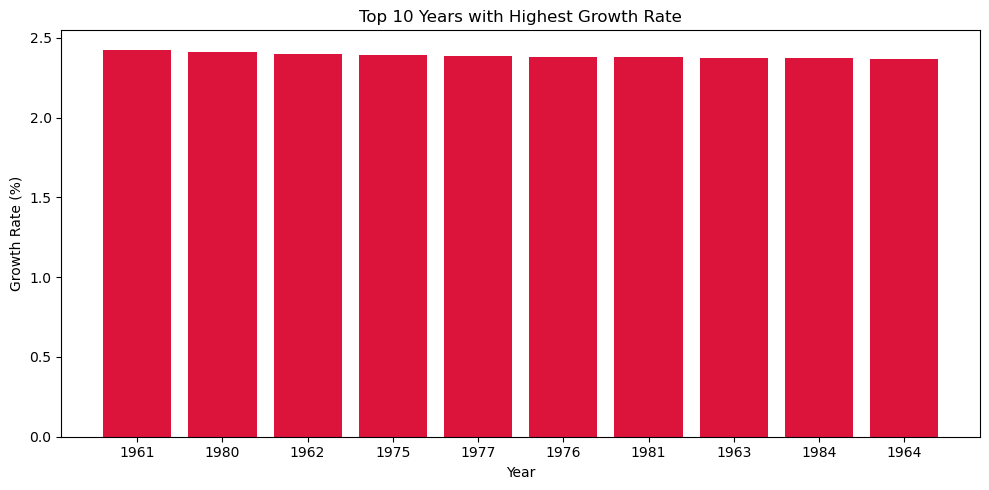

In [24]:
top_growth_years = population.dropna().sort_values("Growth Rate (%)", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_growth_years["Year"].astype(str), top_growth_years["Growth Rate (%)"], color="crimson")
plt.title("Top 10 Years with Highest Growth Rate")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()

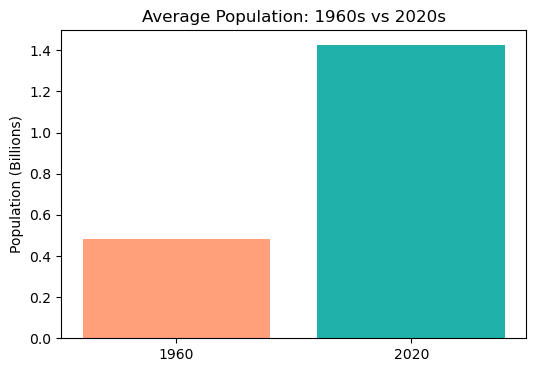

In [26]:
decades_compare = population[population["Decade"].isin([1960, 2020])]
decades_avg = decades_compare.groupby("Decade")["Population"].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.bar(decades_avg["Decade"].astype(str), decades_avg["Population"] / 1e9, color=["#ffa07a", "#20b2aa"])
plt.title("Average Population: 1960s vs 2020s")
plt.ylabel("Population (Billions)")
plt.show()

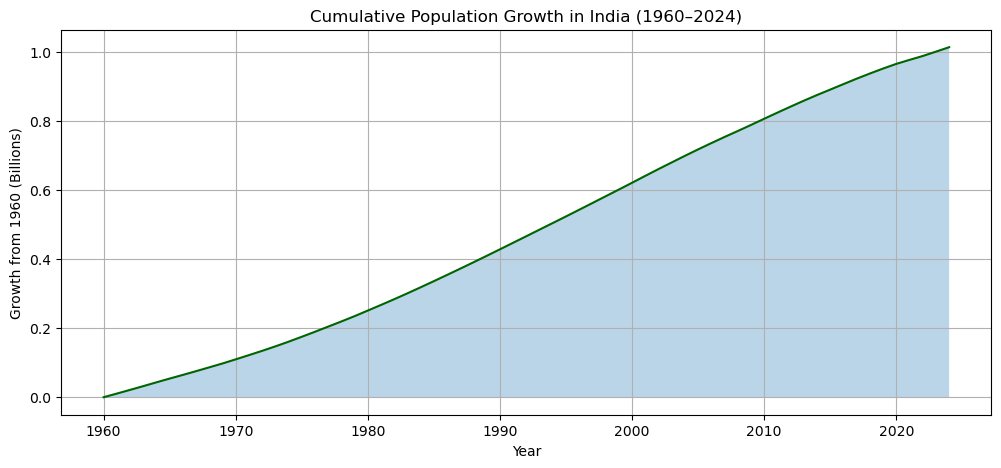

In [28]:
population["Cumulative Growth"] = population["Population"] - population["Population"].iloc[0]
plt.figure(figsize=(12, 5))
plt.plot(population["Year"], population["Cumulative Growth"] / 1e9, color='darkgreen')
plt.fill_between(population["Year"], population["Cumulative Growth"] / 1e9, alpha=0.3)
plt.title("Cumulative Population Growth in India (1960–2024)")
plt.xlabel("Year")
plt.ylabel("Growth from 1960 (Billions)")
plt.grid(True)
plt.show()

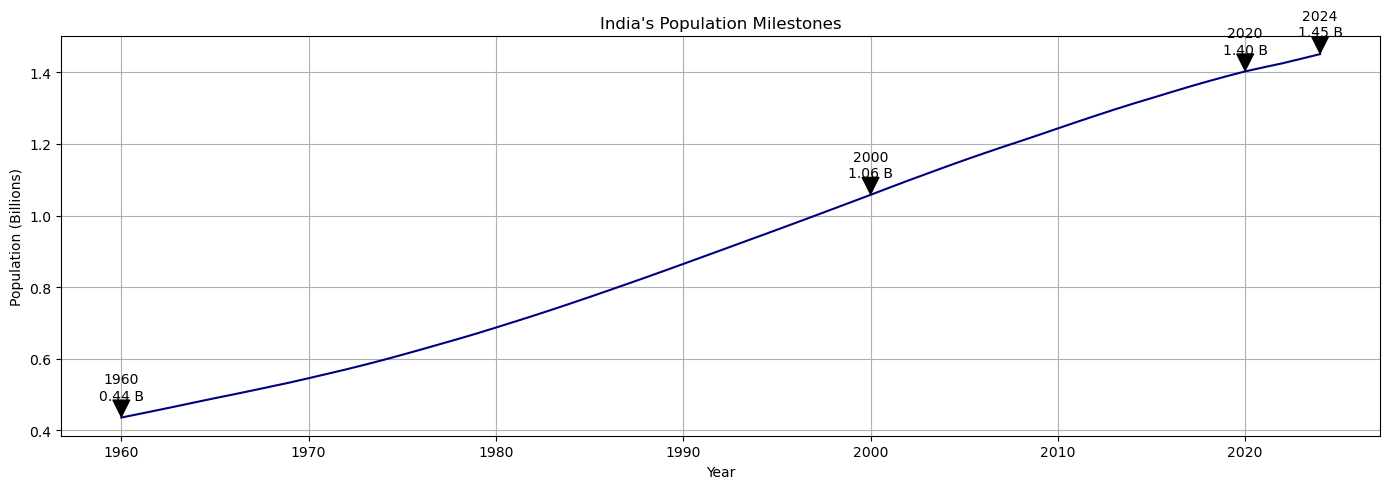

In [30]:
milestones = population[population['Year'].isin([1960, 2000, 2020, 2024])]
plt.figure(figsize=(14, 5))
plt.plot(population['Year'], population['Population'] / 1e9, color="navy")
for _, row in milestones.iterrows():
    plt.annotate(f'{row["Year"]}\n{row["Population"]/1e9:.2f} B',
                 xy=(row["Year"], row["Population"]/1e9),
                 xytext=(row["Year"], row["Population"]/1e9 + 0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, ha='center')

plt.title("India's Population Milestones")
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(True)
plt.tight_layout()
plt.show()

### ✅ Final Summary

This notebook fulfills Task 01 by:
- Cleaning real-world population data
- Extracting and transforming India’s population data
- Visualizing population trends using bar, line, area, and histogram charts
- Analyzing growth rates, decade averages, and cumulative trends
- Categorizing yearly growth into low, medium, and high
- Highlighting key milestones from 1960 to 2024

This approach uses Python-based data science tools to understand how population changes over time, fulfilling the objective of visualizing continuous/categorical variables effectively.
